In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from __future__ import division
%matplotlib inline

In [2]:
#G=nx.read_edgelist('bio-celegans.txt', nodetype=int)
N = 1000
p = 0.05
G = nx.erdos_renyi_graph(N, p)

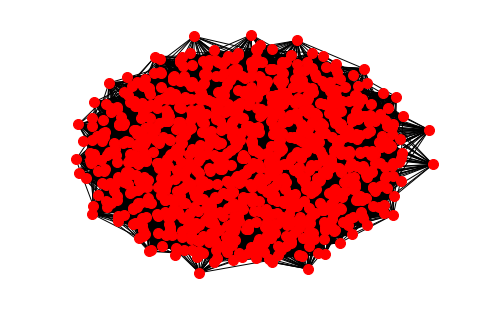

In [3]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=100)#,with_labels=True)

In [4]:
nodeNumber = nx.number_of_nodes(G)
edgeNumber = nx.number_of_edges(G)
print("Total node number: ", nodeNumber)
print("Total dege number: ", edgeNumber)

Total node number:  1000
Total dege number:  24998


## Model 1

Выбираем случайно вершину i и активируем ее(заражаем, если говорить в терминах эпидемиологии). Далее, итерационно делаем следующее: 
1. Выбираем случайным образом одного активного соседа этой вершины, скажем вершину j. И с вероятностью p (параметр модели) вылечиваем вершину j. 
2. С вероятностью 1-p заражаю случайно выбранного здорового соседа 
3. Из зараженных случайно выбираем одну и повторяем шаги 1),2) 

In [44]:
def model1(G, N, numberSteps, threshold):
    inf = []
    susc = []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    inf.append(cur_infected_node)
    
    for i in range(numberSteps):
        print("Current infected: ", cur_infected_node)
               
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        print("All infected nodes: ", inf)
               
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
            if not not_infected_neighbors:
                print("Exit")
                break
                   
        print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
               
        next_infected_node = None
        p = random.uniform(0, 1)
        print(p)
        if p > threshold:
            next_infected_node = random.choice(not_infected_neighbors)
               
        p = random.uniform(0, 1)
        print(1 - p)
        if 1 - p > threshold:
            print("Вершина {} выздоровела".format(cur_infected_node))
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                print("не заразили никого, и сами выздоровели")
                break
                   
        if next_infected_node != None:
            print("Next infected: ", next_infected_node)
            cur_infected_node = next_infected_node
        print("-------------------------------")
        print("All infected nodes: ", inf)
    return(len(inf) / N)

In [46]:
model1(G, N, 1000, 0.001)

Current infected:  522
All infected nodes:  [522]
All neighbors of 522:  [13, 38, 41, 52, 58, 141, 157, 194, 197, 209, 211, 221, 222, 244, 258, 263, 272, 288, 303, 354, 355, 419, 433, 477, 482, 518, 526, 546, 578, 587, 657, 659, 690, 691, 697, 740, 769, 785, 792, 845, 848, 860, 873, 879, 916, 950, 976]
0.24875554322398918
0.32035352369547665
Вершина 522 выздоровела
Next infected:  659
-------------------------------
All infected nodes:  []
Current infected:  659
All infected nodes:  [659]
All neighbors of 659:  [41, 73, 79, 86, 89, 91, 139, 174, 203, 205, 229, 247, 285, 315, 385, 407, 417, 428, 444, 507, 522, 532, 585, 619, 624, 638, 656, 661, 681, 692, 714, 715, 733, 758, 763, 771, 802, 804, 820, 829, 861, 863, 877, 895, 899, 900, 953, 962, 981, 983]
0.3099220702681488
0.9301457043451213
Вершина 659 выздоровела
Next infected:  962
-------------------------------
All infected nodes:  []
Current infected:  962
All infected nodes:  [962]
All neighbors of 962:  [1, 15, 39, 69, 84, 90, 98,

-------------------------------
All infected nodes:  []
Current infected:  152
All infected nodes:  [152]
All neighbors of 152:  [1, 16, 18, 37, 81, 86, 150, 157, 162, 174, 191, 201, 228, 247, 250, 283, 296, 303, 320, 339, 346, 363, 369, 389, 396, 467, 505, 535, 558, 569, 605, 611, 633, 639, 643, 655, 660, 667, 672, 674, 697, 749, 776, 799, 809, 829, 836, 838, 840, 883, 885, 890, 897, 922, 925, 927, 955, 957, 966, 994]
0.8868982427833109
0.7113355913066751
Вершина 152 выздоровела
Next infected:  369
-------------------------------
All infected nodes:  []
Current infected:  369
All infected nodes:  [369]
All neighbors of 369:  [48, 76, 78, 100, 151, 152, 153, 160, 165, 171, 175, 188, 204, 206, 224, 228, 230, 260, 265, 269, 286, 300, 313, 325, 333, 394, 427, 448, 449, 456, 513, 517, 535, 553, 558, 570, 582, 625, 629, 649, 687, 716, 771, 779, 788, 791, 819, 820, 839, 845, 847, 860, 869, 871, 888, 889, 893, 903, 964]
0.10240611099601638
0.8651843163288753
Вершина 369 выздоровела
Next infec

Вершина 993 выздоровела
Next infected:  263
-------------------------------
All infected nodes:  []
Current infected:  263
All infected nodes:  [263]
All neighbors of 263:  [2, 61, 79, 146, 149, 177, 198, 207, 267, 283, 318, 359, 408, 435, 469, 522, 530, 531, 549, 553, 568, 584, 604, 645, 646, 650, 652, 684, 724, 737, 767, 783, 797, 813, 839, 843, 874, 902, 929, 981, 987, 990, 993]
0.2824321482842329
0.5378193914410708
Вершина 263 выздоровела
Next infected:  929
-------------------------------
All infected nodes:  []
Current infected:  929
All infected nodes:  [929]
All neighbors of 929:  [12, 20, 52, 53, 72, 94, 156, 170, 186, 192, 205, 218, 238, 247, 257, 260, 261, 262, 263, 319, 325, 332, 359, 360, 366, 370, 371, 395, 462, 465, 475, 479, 520, 526, 572, 574, 590, 606, 614, 616, 654, 655, 663, 665, 683, 724, 743, 760, 802, 823, 826, 828, 833, 837, 868, 880, 892, 932, 933, 985, 999]
0.9875961458704333
0.8217375527599042
Вершина 929 выздоровела
Next infected:  479
----------------------

All infected nodes:  [491]
All neighbors of 491:  [21, 29, 38, 74, 96, 115, 151, 179, 185, 189, 190, 207, 212, 237, 239, 252, 254, 283, 286, 291, 310, 324, 329, 335, 379, 384, 405, 415, 438, 441, 459, 493, 511, 520, 521, 523, 529, 541, 575, 655, 721, 760, 777, 793, 843, 864, 871, 895, 914, 932, 937, 939]
0.9117447882996866
0.15355912937637084
Вершина 491 выздоровела
Next infected:  185
-------------------------------
All infected nodes:  []
Current infected:  185
All infected nodes:  [185]
All neighbors of 185:  [1, 14, 21, 25, 36, 52, 66, 84, 135, 141, 165, 173, 201, 203, 254, 255, 262, 285, 301, 309, 312, 317, 338, 365, 373, 380, 394, 450, 470, 482, 485, 491, 493, 513, 514, 538, 578, 612, 638, 654, 688, 694, 765, 811, 815, 868, 894, 903, 919, 969, 986]
0.31441799685914595
0.31636392459900187
Вершина 185 выздоровела
Next infected:  482
-------------------------------
All infected nodes:  []
Current infected:  482
All infected nodes:  [482]
All neighbors of 482:  [3, 10, 72, 75, 104, 1

All neighbors of 533:  [24, 35, 40, 46, 89, 104, 122, 151, 184, 196, 219, 222, 238, 256, 260, 296, 300, 350, 363, 367, 373, 381, 392, 400, 424, 425, 546, 650, 662, 668, 705, 726, 741, 750, 762, 764, 802, 808, 820, 842, 850, 851, 852, 875, 886, 894, 926, 936, 948, 972, 978, 987]
0.6260234429670235
0.14008064424600197
Вершина 533 выздоровела
Next infected:  894
-------------------------------
All infected nodes:  []
Current infected:  894
All infected nodes:  [894]
All neighbors of 894:  [39, 105, 165, 185, 208, 213, 232, 234, 250, 265, 270, 303, 322, 335, 348, 359, 362, 393, 430, 460, 476, 512, 520, 533, 571, 593, 614, 620, 678, 692, 760, 763, 764, 791, 794, 795, 809, 834, 863, 899, 903, 919, 930]
0.10219718188992999
0.21123816204184387
Вершина 894 выздоровела
Next infected:  899
-------------------------------
All infected nodes:  []
Current infected:  899
All infected nodes:  [899]
All neighbors of 899:  [0, 4, 11, 18, 27, 28, 34, 71, 128, 133, 139, 147, 173, 196, 201, 228, 233, 246, 

Next infected:  228
-------------------------------
All infected nodes:  []
Current infected:  228
All infected nodes:  [228]
All neighbors of 228:  [6, 46, 58, 84, 90, 113, 116, 126, 152, 178, 215, 222, 225, 226, 232, 243, 268, 294, 314, 323, 369, 374, 380, 382, 429, 442, 454, 470, 474, 486, 488, 489, 490, 497, 545, 592, 625, 630, 641, 645, 687, 726, 772, 799, 823, 831, 854, 859, 866, 899, 906, 928, 973, 975]
0.2732044946915887
0.31554030996055515
Вершина 228 выздоровела
Next infected:  178
-------------------------------
All infected nodes:  []
Current infected:  178
All infected nodes:  [178]
All neighbors of 178:  [49, 51, 63, 65, 93, 115, 124, 191, 228, 241, 276, 292, 310, 342, 414, 431, 436, 472, 496, 524, 542, 544, 549, 551, 559, 585, 604, 607, 623, 642, 653, 654, 662, 699, 734, 789, 791, 807, 827, 864, 880, 889, 898, 908, 995]
0.9965347968384345
0.6864674587514761
Вершина 178 выздоровела
Next infected:  228
-------------------------------
All infected nodes:  []
Current infecte

All infected nodes:  [410]
All neighbors of 410:  [2, 78, 151, 160, 161, 169, 192, 215, 231, 246, 251, 268, 272, 302, 317, 323, 326, 333, 338, 355, 370, 384, 387, 418, 423, 446, 474, 495, 503, 524, 544, 554, 561, 571, 605, 636, 657, 731, 733, 756, 905, 906, 911, 924, 931, 997]
0.6557445988126559
0.2687251256713974
Вершина 410 выздоровела
Next infected:  446
-------------------------------
All infected nodes:  []
Current infected:  446
All infected nodes:  [446]
All neighbors of 446:  [7, 26, 30, 39, 86, 111, 173, 214, 246, 264, 270, 279, 305, 321, 385, 396, 402, 410, 451, 492, 495, 530, 556, 561, 566, 584, 595, 603, 627, 641, 655, 656, 678, 690, 711, 752, 769, 770, 774, 783, 792, 804, 806, 822, 827, 828, 829, 834, 840, 867, 871, 893, 904, 943, 959, 978]
0.11677648835622534
0.866244714286788
Вершина 446 выздоровела
Next infected:  566
-------------------------------
All infected nodes:  []
Current infected:  566
All infected nodes:  [566]
All neighbors of 566:  [11, 21, 35, 37, 46, 51, 

All infected nodes:  [254]
All neighbors of 254:  [19, 48, 75, 108, 112, 131, 141, 163, 185, 202, 203, 207, 219, 224, 225, 257, 275, 304, 308, 320, 336, 352, 361, 387, 397, 413, 452, 462, 480, 488, 491, 520, 568, 690, 718, 730, 742, 754, 762, 819, 831, 832, 847, 859, 882, 913, 915, 924, 973, 987, 989, 993]
0.8603243082417183
0.8492327871405804
Вершина 254 выздоровела
Next infected:  915
-------------------------------
All infected nodes:  []
Current infected:  915
All infected nodes:  [915]
All neighbors of 915:  [14, 25, 126, 133, 238, 254, 293, 303, 314, 321, 330, 337, 365, 451, 458, 465, 483, 495, 509, 523, 550, 566, 579, 598, 613, 614, 642, 656, 682, 705, 710, 756, 761, 799, 801, 861, 927, 930, 936, 951, 974, 989]
0.03594681282128742
0.539539946846546
Вершина 915 выздоровела
Next infected:  682
-------------------------------
All infected nodes:  []
Current infected:  682
All infected nodes:  [682]
All neighbors of 682:  [18, 108, 149, 160, 164, 204, 207, 230, 235, 259, 261, 267, 2

Current infected:  97
All infected nodes:  [97]
All neighbors of 97:  [3, 36, 58, 89, 95, 183, 193, 212, 221, 272, 281, 291, 307, 340, 367, 409, 420, 427, 441, 466, 521, 544, 550, 561, 591, 596, 599, 605, 608, 609, 617, 652, 671, 673, 695, 744, 752, 775, 796, 821, 830, 853, 857, 872, 891, 955, 994, 995]
0.48436677681971085
0.5764264842115694
Вершина 97 выздоровела
Next infected:  466
-------------------------------
All infected nodes:  []
Current infected:  466
All infected nodes:  [466]
All neighbors of 466:  [4, 10, 29, 73, 89, 97, 99, 103, 125, 126, 127, 131, 136, 155, 205, 210, 214, 252, 256, 298, 338, 344, 383, 396, 397, 400, 415, 426, 441, 443, 504, 511, 524, 545, 551, 556, 558, 573, 598, 609, 623, 627, 656, 724, 736, 739, 741, 753, 787, 871, 872, 874, 938, 943, 944, 945, 986]
0.5507240526938433
0.9436800789126948
Вершина 466 выздоровела
Next infected:  724
-------------------------------
All infected nodes:  []
Current infected:  724
All infected nodes:  [724]
All neighbors of 7

Next infected:  732
-------------------------------
All infected nodes:  []
Current infected:  732
All infected nodes:  [732]
All neighbors of 732:  [4, 13, 15, 57, 92, 114, 119, 126, 136, 137, 172, 209, 215, 227, 271, 291, 293, 311, 316, 344, 382, 411, 428, 480, 484, 495, 503, 542, 552, 613, 656, 668, 717, 733, 743, 768, 792, 867, 878, 884, 888, 891, 893, 897, 913, 948, 949, 956]
0.554342636045974
0.6972643592929896
Вершина 732 выздоровела
Next infected:  484
-------------------------------
All infected nodes:  []
Current infected:  484
All infected nodes:  [484]
All neighbors of 484:  [0, 16, 78, 112, 128, 215, 223, 237, 276, 315, 320, 344, 374, 386, 390, 425, 429, 463, 519, 538, 540, 558, 561, 569, 571, 591, 599, 631, 667, 682, 690, 696, 698, 732, 758, 777, 813, 835, 844, 852, 856, 903, 910, 925, 936, 945, 962, 966, 972, 991]
0.6634954526893436
0.9595040121629297
Вершина 484 выздоровела
Next infected:  777
-------------------------------
All infected nodes:  []
Current infected:  77

All infected nodes:  []
Current infected:  960
All infected nodes:  [960]
All neighbors of 960:  [15, 21, 66, 78, 89, 110, 113, 143, 184, 250, 261, 265, 305, 314, 316, 365, 373, 399, 440, 511, 516, 518, 538, 559, 599, 619, 653, 655, 694, 737, 753, 785, 787, 796, 810, 814, 849, 871, 888, 907, 910, 914, 917, 937, 940, 946, 948, 967, 981]
0.5871676101791817
0.8840630099628775
Вершина 960 выздоровела
Next infected:  261
-------------------------------
All infected nodes:  []
Current infected:  261
All infected nodes:  [261]
All neighbors of 261:  [2, 9, 14, 77, 91, 92, 95, 99, 126, 143, 144, 146, 161, 162, 224, 227, 232, 235, 275, 282, 293, 311, 313, 332, 335, 339, 363, 395, 403, 416, 422, 460, 479, 499, 537, 581, 585, 602, 624, 633, 663, 664, 665, 682, 688, 708, 719, 733, 739, 742, 805, 870, 929, 930, 951, 960, 977]
0.004763970296897013
0.6821999259285156
Вершина 261 выздоровела
Next infected:  602
-------------------------------
All infected nodes:  []
Current infected:  602
All infected

0.0

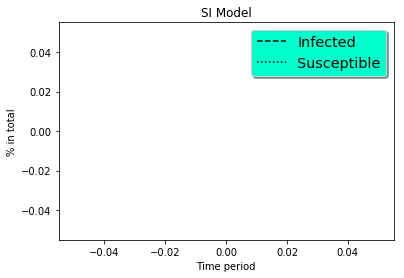

In [32]:
steps = np.arange(1, len(num_inf) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, num_inf, 'k--', label='Infected')
ax.plot(steps, num_susc, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SI Model')

plt.show()

In [7]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel1(G, 100000, 0.8, 0.2, startNode)
print("Infected fraction: ", len(infected) / nx.number_of_nodes(G))

Infected fraction:  0.014


In [8]:
prob = np.arange(0.01, 0.99, 0.02)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr = []
for p in prob:
    infected_arr = getInfectedFractionModel1(G, 1000000, p, 1-p, startNode)
    inf_arr.append(len(infected_arr) / nx.number_of_nodes(G))

Text(0,0.5,'Fraction of infected nodes')

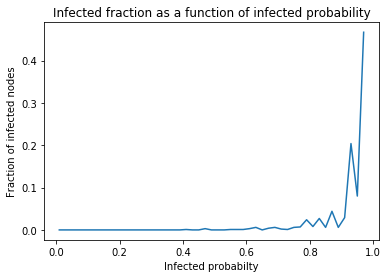

In [9]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob, inf_arr)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

In [12]:
def getInfectedFractionAtEachStepModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    inf_arr_fraction, susc_arr_fraction = [], []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
            
        inf_arr_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_arr_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
        
    return inf_arr_fraction, susc_arr_fraction

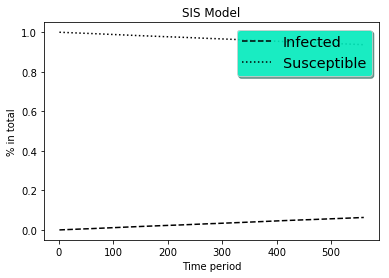

In [13]:
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel1(G, 100000, 0.95, 0.05, startNode)
steps = np.arange(1, len(inf_arr_fraction) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SIS Model')

plt.show()

## Model 2

Выбираем случайно вершину i и активируем ее. Далее, итерационно делаем следующее: 
1. Берем ВСЕХ неактивных соседей этой вершины и с вероятностью p (параметр модели) заражаем каждую из них. 
2. Вершина от которой пошло заражение (вершина i) становится здоровой (неактивной)
3. Из зараженных случайно выбираем одну и повторяем шаги 1, 2

In [12]:
def getInfectedFractionModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
            
    return inf

In [15]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 1000, 0.005, startNode)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  473
Number of steps:  1000
Infected probability:  0.005
Доля зараженных:  0.018


In [16]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 1000, 1, startNode)
print("infected fraction: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  676
Number of steps:  1000
Infected probability:  1
infected fraction:  0.655


In [17]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 1000, 0, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  153
Number of steps:  1000
Infected probability:  0
[153]
Доля зараженных:  0.001


In [20]:
prob_model2 = np.arange(0.0001, 0.3, 0.05)
prob_model2

array([1.000e-04, 5.010e-02, 1.001e-01, 1.501e-01, 2.001e-01, 2.501e-01])

In [21]:
prob_model2 = np.arange(0.0001, 0.3, 0.05)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_model2 = []
for p in prob_model2:
    infected_arr = getInfectedFractionModel2(G, 1000, p, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.0001
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.050100000000000006
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.10010000000000001
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.1501
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.2001
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  969
Number of steps:  1000
Infected probability:  0.

Text(0,0.5,'Fraction of infected nodes')

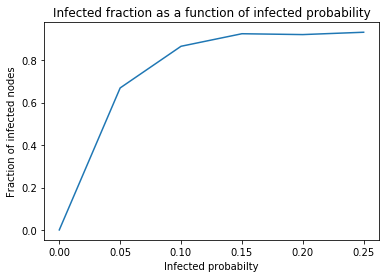

In [22]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob_model2, inf_arr_model2)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

$\alpha = 0.05$

##### Интересно, зависит ли заражение от источника заражения?

In [19]:
start_nodes = np.arange(1, 100, 1)
inf_arr_model2 = []
for startNode in start_nodes:
    infected_arr = getInfectedFractionModel2(G, 100, 0.5, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  2
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  3
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  5
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  6
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
------------

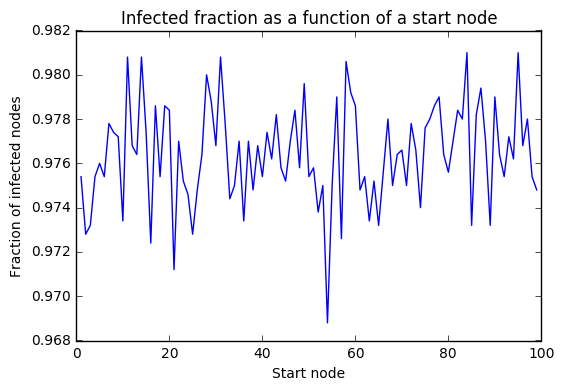

In [20]:
plt.title('Infected fraction as a function of a start node')
plt.plot(start_nodes, inf_arr_model2)
plt.xlabel('Start node')
plt.ylabel('Fraction of infected nodes')

##### Вывод: в модели 2 зависимости от стартовой вершины заражения не выявлено

In [24]:
def getInfectedFractionAtEachStepModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    infected_fraction = []
    susc_fraction = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
        infected_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
             
    return infected_fraction, susc_fraction

In [25]:
steps = np.arange(1, 10001, 1)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel2(G, 10000, 0.05, startNode)

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  258
Number of steps:  10000
Infected probability:  0.05


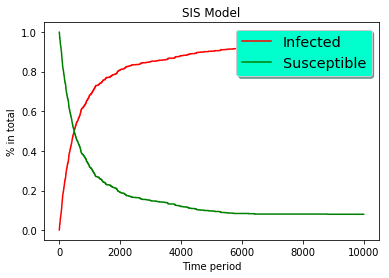

In [28]:
fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'r', label='Infected')
ax.plot(steps, susc_arr_fraction, 'g', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SIS Model')

plt.show()

In [49]:
inf_arr_fraction[-1], susc_arr_fraction[-1]

(0.92, 0.08)